In [5]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

from utils import *
import matplotlib.pyplot as plt

t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.02
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)


In [2]:
playback_sessions = ['ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240725_SESSION_00', 'ALTAI_20240726_SESSION_01','ALTAI_20240809_SESSION_00', 'ALTAI_20240814_SESSION_00', 'ALTAI_20240822_SESSION_00']

trackingonly_sessions = ['ALTAI_20240910_SESSION_00','ALTAI_20240722_SESSION_02', 'ALTAI_20240722_SESSION_04', 'ALTAI_20240712_SESSION_01']

playbackonly_sessions = ['ALTAI_20240710_SESSION_00', 'ALTAI_20240711_SESSION_00', 'ALTAI_20240711_SESSION_01', 'ALTAI_20240712_SESSION_00']

all_sessions = np.hstack((playback_sessions, trackingonly_sessions, playbackonly_sessions))

tracking_psth, playback_psth = [], []

for session in all_sessions:
    print(session)
    path = '/Volumes/data2/eTheremin/ALTAI/'+ session + '/' # in macbook
    #path = '/auto/data2/eTheremin/ALTAI/' + session + '/' # on linux
    try : 
        tracking_psth.append(np.load(path+f'psth_tracking_{bin_width}.npy'))
    except : 
        pass
    try:
        playback_psth.append(np.load(path+f'psth_playback_{bin_width}.npy'))
    except:
        pass
tr_psth = np.vstack(tracking_psth)
pb_psth = np.vstack(playback_psth)


ALTAI_20240724_SESSION_01
ALTAI_20240724_SESSION_02
ALTAI_20240725_SESSION_00
ALTAI_20240726_SESSION_01
ALTAI_20240809_SESSION_00
ALTAI_20240814_SESSION_00
ALTAI_20240822_SESSION_00
ALTAI_20240910_SESSION_00
ALTAI_20240722_SESSION_02
ALTAI_20240722_SESSION_04
ALTAI_20240712_SESSION_01
ALTAI_20240710_SESSION_00
ALTAI_20240711_SESSION_00
ALTAI_20240711_SESSION_01
ALTAI_20240712_SESSION_00


ValueError: need at least one array to concatenate

In [11]:
session = 'ALTAI_20240724_SESSION_02'
path = f'/Volumes/data2/eTheremin/ALTAI/'+ session + '/'
data = np.load(path+f'headstage_0/data_{bin_width}.npy', allow_pickle=True)
features = np.load(path+f'headstage_0/features_{bin_width}.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking') # ici matrice n_clus x n_trigs x n_bins
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback') # ici matrice n_clus x n_trigs x n_bins
tracking_transpose = np.moveaxis(tracking, 1, 0)     # ici matrice transposée dans le bon format  : n_trigs x n_clus x n_bins
playback_transpose = np.moveaxis(playback, 1, 0) 
X_total = np.vstack((tracking_transpose, playback_transpose)) # tracking et playback concaténés

y_tracking = np.zeros(len(tracking_transpose))
y_playback = np.ones(len(playback_transpose))
y = np.hstack((y_tracking,y_playback ))

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_total = []
for k in range(len(psth_bins)):
    X = X_total[:, :, k]


    # Étape 3: Séparer les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Étape 4: Standardiser les données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Étape 5: Entraîner un modèle (Random Forest dans cet exemple)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Étape 6: Faire des prédictions
    y_pred = model.predict(X_test_scaled)

    # Étape 7: Évaluer le modèle
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_total.append(accuracy)
    print("Exactitude (accuracy):", accuracy)

Exactitude (accuracy): 0.6329884357881923
Exactitude (accuracy): 0.6329884357881923
Exactitude (accuracy): 0.6469872185027389
Exactitude (accuracy): 0.6433353621424224
Exactitude (accuracy): 0.6402921485088253
Exactitude (accuracy): 0.632379793061473
Exactitude (accuracy): 0.6269020085209982
Exactitude (accuracy): 0.6342057212416312
Exactitude (accuracy): 0.6475958612294583
Exactitude (accuracy): 0.6329884357881923
Exactitude (accuracy): 0.6384662203286671
Exactitude (accuracy): 0.6409007912355448
Exactitude (accuracy): 0.6585514303104077
Exactitude (accuracy): 0.642726719415703
Exactitude (accuracy): 0.6731588557516738
Exactitude (accuracy): 0.6561168594035302
Exactitude (accuracy): 0.6475958612294583
Exactitude (accuracy): 0.6695069993913573
Exactitude (accuracy): 0.6415094339622641
Exactitude (accuracy): 0.6488131466828971
Exactitude (accuracy): 0.6597687157638467
Exactitude (accuracy): 0.6597687157638467
Exactitude (accuracy): 0.6786366402921485
Exactitude (accuracy): 0.65003043213

Exactitude (accuracy) for psth_bin 0: 1.0
Exactitude (accuracy) for psth_bin 1: 1.0
Exactitude (accuracy) for psth_bin 2: 1.0
Exactitude (accuracy) for psth_bin 3: 1.0
Exactitude (accuracy) for psth_bin 4: 1.0
Exactitude (accuracy) for psth_bin 5: 1.0
Exactitude (accuracy) for psth_bin 6: 1.0
Exactitude (accuracy) for psth_bin 7: 1.0
Exactitude (accuracy) for psth_bin 8: 1.0
Exactitude (accuracy) for psth_bin 9: 1.0


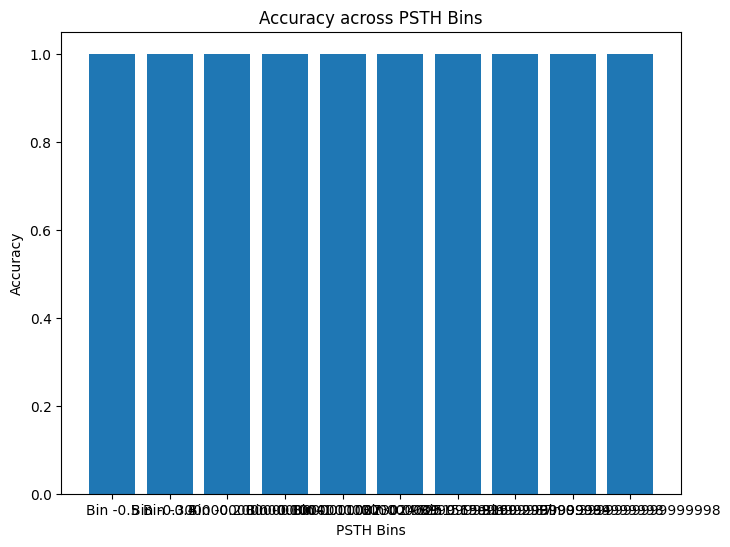

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_total = []  # List to store accuracy values for each bin

for k in range(len(psth_bins)):
    X = X_total[:, :, k]  # Extract the k-th PSTH bin data

    # Step 3: Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 5: Train a Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Step 6: Make predictions
    y_pred = model.predict(X_test_scaled)

    # Step 7: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_total.append(accuracy)
    print(f"Exactitude (accuracy) for psth_bin {k}: {accuracy}")

# Plot the accuracy matrix as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(accuracy_total)), accuracy_total)
plt.xlabel('PSTH Bins')
plt.ylabel('Accuracy')
plt.title('Accuracy across PSTH Bins')
plt.xticks(range(len(psth_bins)), [f'Bin {i}' for i in psth_bins])
plt.show()


PSTH bin 0 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 1 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 2 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 3 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 4 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 5 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 6 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 7 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 8 - Mean Squared Error (MSE): 0.0, R-squared: 1.0
PSTH bin 9 - Mean Squared Error (MSE): 0.0, R-squared: 1.0


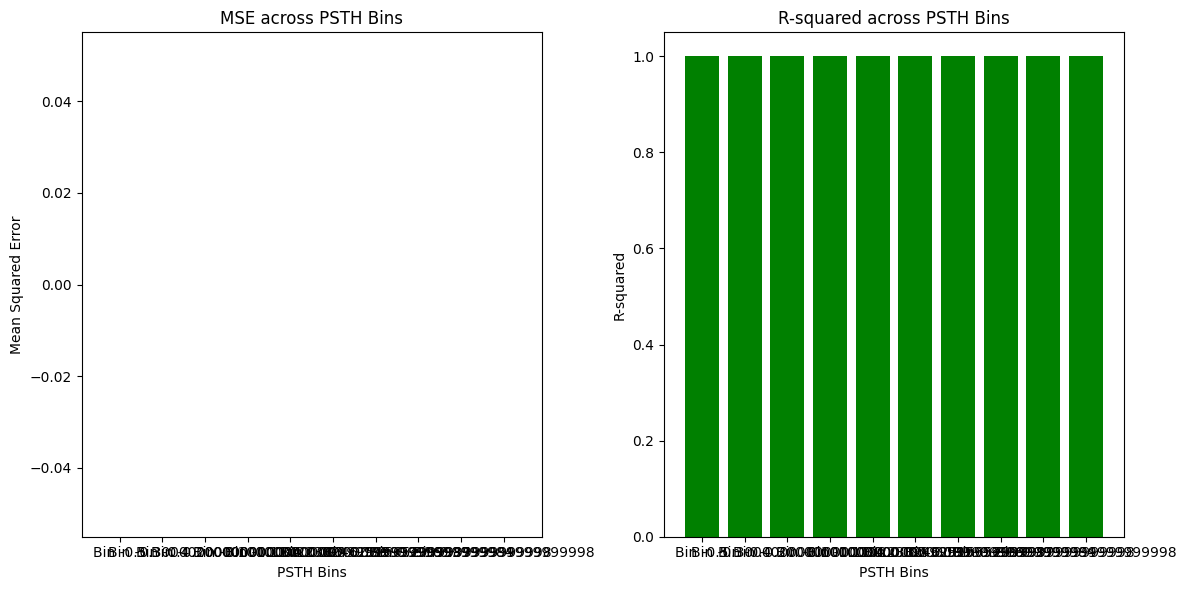

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Simulated data for illustration (now continuous labels for regression)

mse_total = []  # List to store Mean Squared Error (MSE) for each bin
r2_total = []   # List to store R-squared scores for each bin

for k in range(len(psth_bins)):
    X = X_total[:, :, k]  # Extract the k-th PSTH bin data

    # Step 3: Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 5: Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Step 6: Make predictions
    y_pred = model.predict(X_test_scaled)

    # Step 7: Evaluate the model (MSE and R-squared)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_total.append(mse)
    r2_total.append(r2)

    print(f"PSTH bin {k} - Mean Squared Error (MSE): {mse}, R-squared: {r2}")

# Plotting the MSE and R-squared across PSTH bins
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(range(len(mse_total)), mse_total, color='blue')
plt.xlabel('PSTH Bins')
plt.ylabel('Mean Squared Error')
plt.title('MSE across PSTH Bins')
plt.xticks(range(len(psth_bins)), [f'Bin {i}' for i in psth_bins])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(range(len(r2_total)), r2_total, color='green')
plt.xlabel('PSTH Bins')
plt.ylabel('R-squared')
plt.title('R-squared across PSTH Bins')
plt.xticks(range(len(psth_bins)), [f'Bin {i}' for i in psth_bins])

plt.tight_layout()
plt.show()


In [62]:
# Calcul des features pour les psth
tr_sustained = [get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in tr_psth]
pb_sustained = [get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in pb_psth]

tr_total_evoked = get_total_evoked_response(tr_psth, t_pre, t_post, bin_width, None, 0, 140)
pb_total_evoked = get_total_evoked_response(pb_psth, t_pre, t_post, bin_width, None, 0, 140)

tr_peak = [tr_total_evoked[i] - tr_sustained[i] for i in range(len(tr_sustained))]
pb_peak = [pb_total_evoked[i] - pb_sustained[i] for i in range(len(pb_sustained))]


In [63]:
X_tr = np.column_stack((tr_sustained, tr_total_evoked, tr_peak))
X_pb = np.column_stack((pb_sustained, pb_total_evoked, pb_peak))
y_tr = np.zeros(len(X_tr))
y_pb = np.ones(len(X_pb))

In [64]:
X = np.vstack((X_tr, X_pb))
y = np.hstack((y_tr, y_pb))

In [69]:
len(X)

653

Accuracy: 0.66
Confusion Matrix:
[[48 22]
 [22 39]]


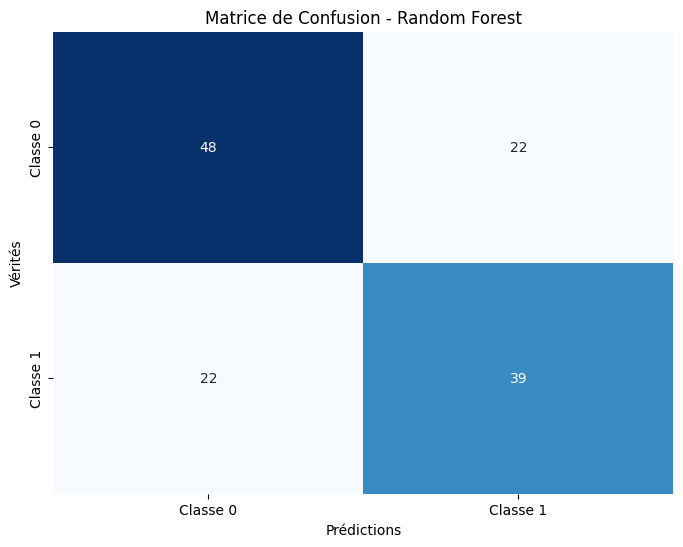

In [65]:
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Modèle Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Étape 2: Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 3: Créer le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 arbres

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Étape 4: Prédire les étiquettes pour les données de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Étape 5: Visualiser la matrice de confusion avec Matplotlib et Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion - Random Forest")
plt.show()




Accuracy: 0.61
Confusion Matrix:
[[45 25]
 [26 35]]


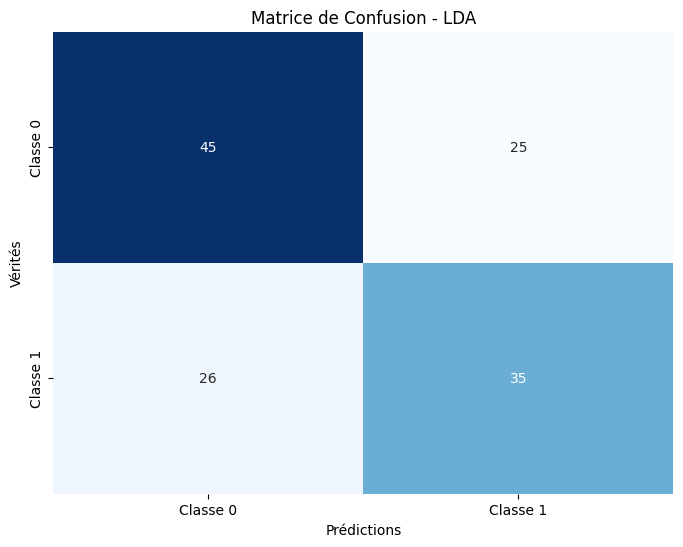

In [57]:
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Modèle LDA
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 2: Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 3: Créer le modèle LDA
model = LinearDiscriminantAnalysis()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Étape 4: Prédire les étiquettes pour les données de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Étape 5: Visualiser la matrice de confusion avec Matplotlib et Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion - LDA")
plt.show()

